In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hust-ex1-it5425e-data-governance-and-visualization/Players.csv
/kaggle/input/hust-ex1-it5425e-data-governance-and-visualization/Teams.csv
/kaggle/input/hust-ex1-it5425e-data-governance-and-visualization/CitiesExt.csv


CitiesExt.csv
• Ten countries with the highest population, bar chart
showing populations
• Pie chart showing relative number of cities with
negative longitude and positive longitude. Label the
two slices “west” for west of the Prime Meridian
(negative longitude), and “east” for east of the Prime
Meridian (positive longitude)
• Is there is any relationship between the latitude of
cities in a country (x-axis) and the population of that
country (y-axis) (scatter plot)

<Axes: title={'center': 'Relationship between latitude & population'}, xlabel='latitude', ylabel='population'>

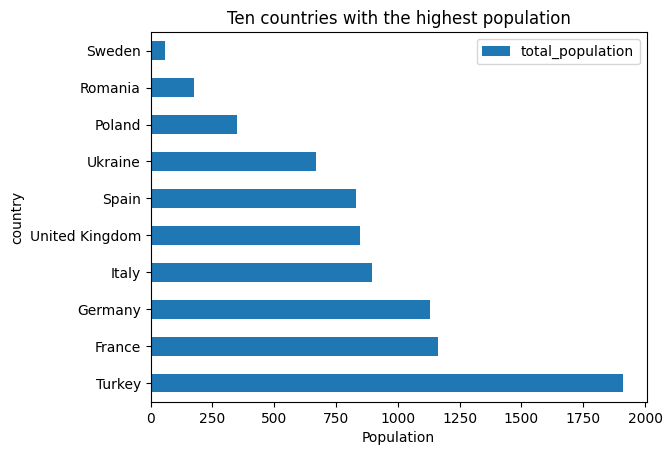

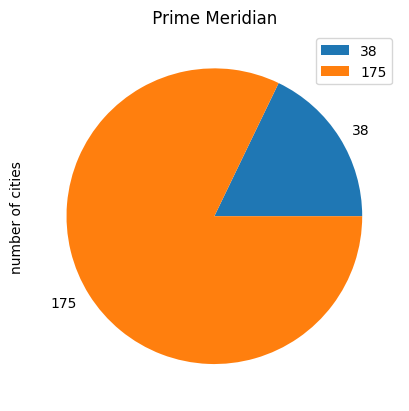

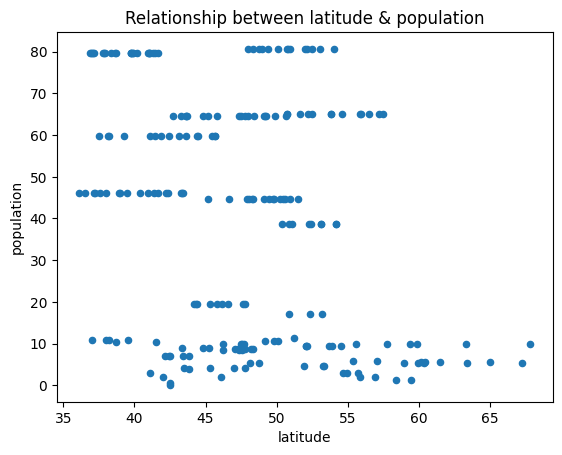

In [55]:
import pandas as pd

df1 = pd.read_csv('/kaggle/input/hust-ex1-it5425e-data-governance-and-visualization/CitiesExt.csv')

# Ten countries with the highest population, bar chart showing populations
group_by_countries = df1.groupby(['country']).agg(
    total_population=('population', 'sum')
).sort_values(by='total_population', ascending=False).head(10)

group_by_countries

group_by_countries.plot(kind='barh', xlabel='Population',
                        title="Ten countries with the highest population")


# Pie chart showing relative number of cities with negative longitude and 
# positive longitude. Label the two slices “west” for west of the Prime 
# Meridian (negative longitude), and “east” for east of the Prime Meridian 
# (positive longitude) 

neg_lon = df1[df1['longitude'] < 0]
neg_lon.shape[0]
pos_lon = df1[df1['longitude'] >= 0]
pos_lon.shape[0]

pdf = pd.DataFrame({'slides' : ['west', 'east'], 
                    'number of cities': [neg_lon.shape[0], pos_lon.shape[0]]})

pdf.set_index('slides', inplace=True)
pdf.plot(kind='pie', y = 'number of cities', 
         title=' Prime Meridian ', labels=pdf['number of cities'])

# Is there is any relationship between the latitude of cities in a 
# country (x-axis) and the population of that country (y-axis) (scatter plot)

df1.plot(kind='scatter', x='latitude', y='population', 
         title='Relationship between latitude & population')

PlayersExt.csv
• Create a bar chart showing the average number of minutes
played by players in each of the four positions.
• Create a stacked bar chart for teams that played more than
4 games, showing their number of wins, draws, and losses.
• Create a pie chart showing the relative percentage of teams
with 0, 1, and 2 red cards. Note: the pie should have three
slices.
• Create a scatterplot of players showing passes (y-axis)
versus minutes (x-axis). (Why are there some lines of dots?)
• Create a map of countries colored light to dark blue based
on how many goals their team made (“goalsFor”).
• Create a pie chart showing the relative percentage of
players making <= 0.25 passes per minute, >= 0.5 passes
per minute, and between 0.25 and 0.5.

/tmp/ipykernel_24/973994351.py:41: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


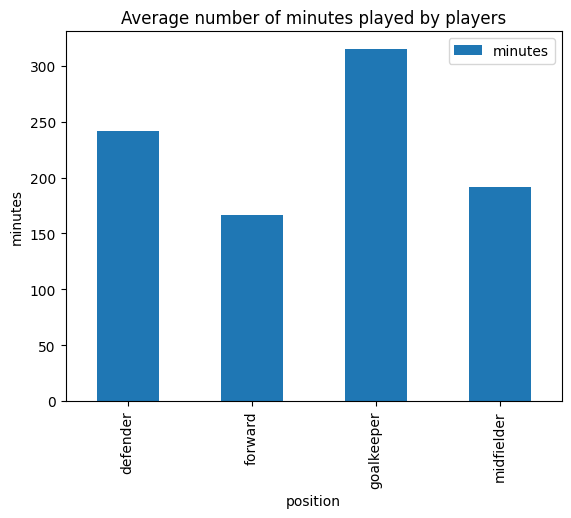

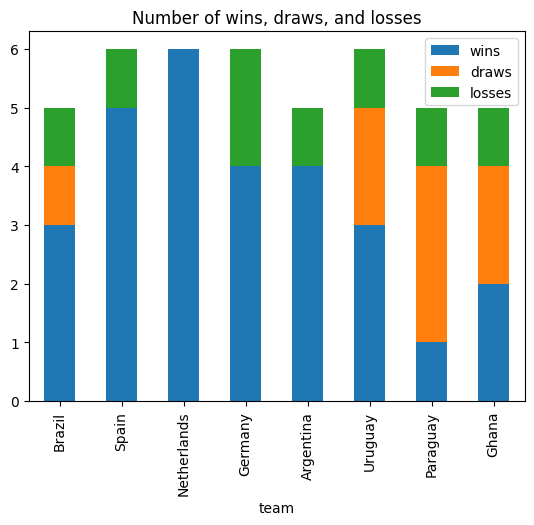

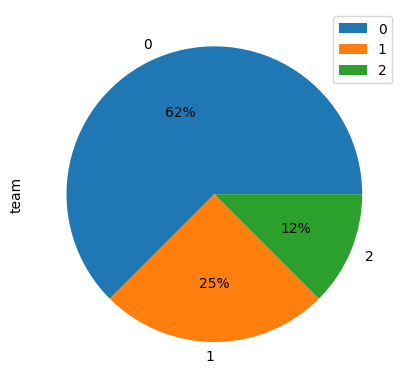

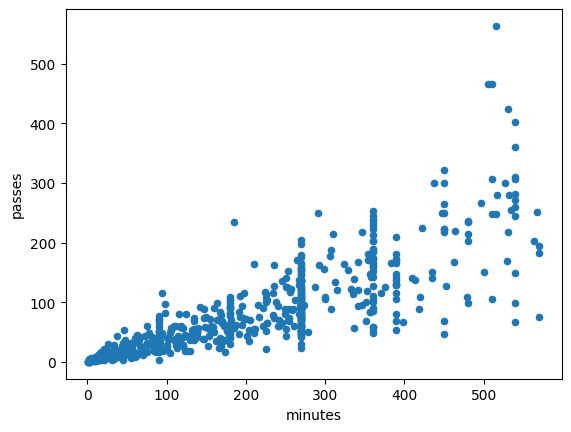

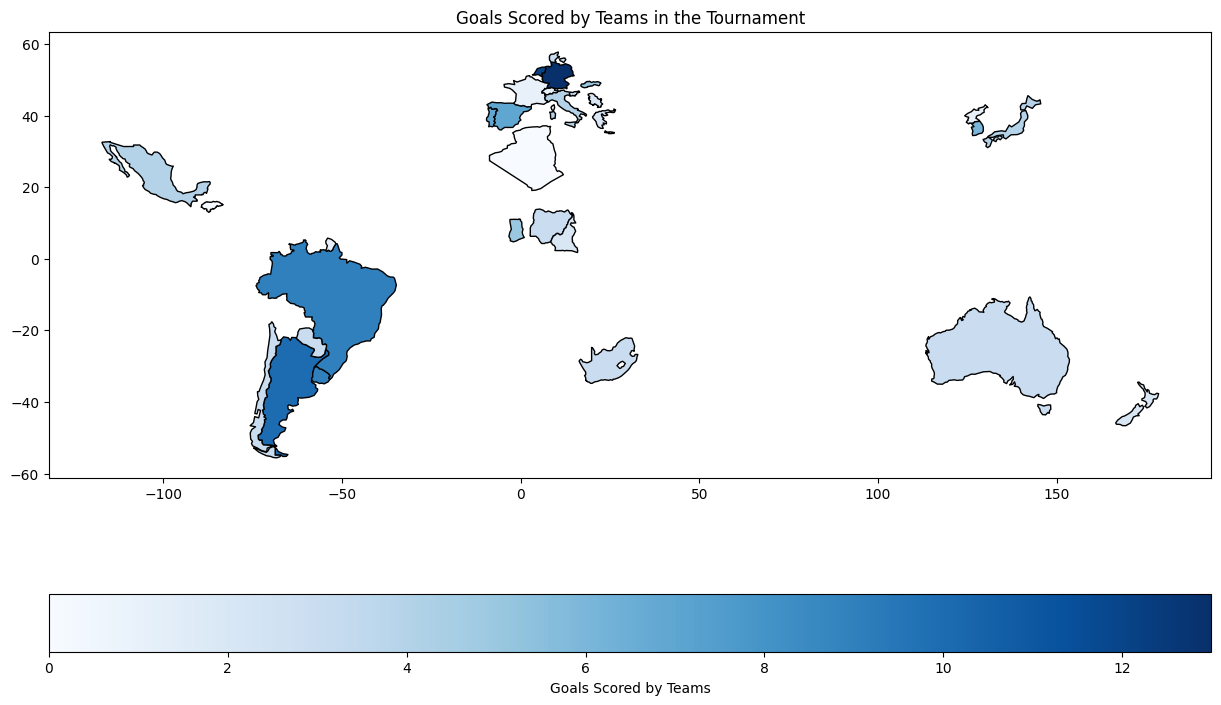

/tmp/ipykernel_24/973994351.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['pass per minute'] = pdf['passes'] / pdf['minutes']
/tmp/ipykernel_24/973994351.py:65: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ipdf = pdf.groupby(


<Axes: title={'center': 'passes per minute'}, ylabel='amount'>

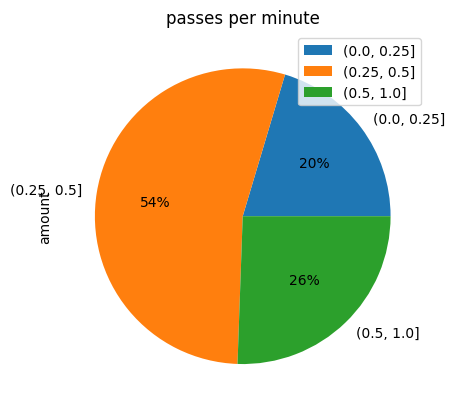

In [104]:
import pandas as pd

df2 = pd.read_csv('/kaggle/input/hust-ex1-it5425e-data-governance-and-visualization/Players.csv')

# Create a bar chart showing the average number of minutes
# played by players in each of the four positions.

#gdf = df2[['surname', 'team', 'minutes']].groupby(['surname', 'team']).mean() 
gdf = df2[['position', 'minutes']].groupby('position').mean()
gdf.plot(kind='bar', title='Average number of minutes played by players', ylabel='minutes')

# Create a stacked bar chart for teams that played more than 4 games,
# showing their number of wins, draws, and losses.

dft = pd.read_csv('/kaggle/input/hust-ex1-it5425e-data-governance-and-visualization/Teams.csv')

df_4t = dft[['team','wins','draws','losses']][dft['games'] > 4]
df_4t.set_index('team').plot(kind='bar', stacked=True,
                            title='Number of wins, draws, and losses')

# Create a pie chart showing the relative percentage of teams with 0, 1, and 2 red cards.
# Note: the pie should have three slices

dft.groupby('redCards').count()[['team']].plot(
    kind='pie', y='team', autopct='%1.0f%%'
)

#  Create a scatterplot of players showing passes (y-axis) versus minutes (x-axis).
# (Why are there some lines of dots? -> they don't have any relationship

df2.plot(kind='scatter', x='minutes', y='passes')

# • Create a map of countries colored light to dark blue based on how many goals their 
# team made (“goalsFor”).

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world = world.rename(columns={'name': 'team'})
merged = world.set_index('team').join(dft[['team', 'goalsFor']].set_index('team'))

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot the world map with countries colored by 'goalsFor'
merged.plot(column='goalsFor', ax=ax, legend=True,
            legend_kwds={'label': "Goals Scored by Teams",
                         'orientation': "horizontal"},
            cmap='Blues',  # Color map for light to dark blue
            edgecolor='black')

plt.title('Goals Scored by Teams in the Tournament')

# Show the plot
plt.show()

# Create a pie chart showing the relative percentage of players making <= 0.25 
# passes per minute, >= 0.5 passes per minute, and between 0.25 and 0.5.

pdf = df2[['surname', 'passes', 'minutes']]
pdf['pass per minute'] = pdf['passes'] / pdf['minutes'] 
ipdf = pdf.groupby(
    pd.cut(pdf['pass per minute'], [0, 0.25, 0.5, 1])).count()

ndf = ipdf[['surname']].reset_index()
ndf.rename(columns={'pass per minute': 'interval', 'surname': 'amount'}, inplace=True)
#ipdf.plot(kind='pie', y='pass per minute',  autopct='%1.0f%%',          title='passes per minute')


ndf.set_index('interval').plot(kind='pie', y='amount', autopct='%1.0f%%' ,
                               title='passes per minute')

